# **BDeep Learning**

In [ ]:
IMAGE_SIZE = 128
CLASSES = ['Japon', 'Europe', 'USA', 'Coree']
SPLIT_RATIO = 2

In [ ]:
!rm -r ProjetApprentissageProfond
!git clone https://github.com/JokerOrphelin49/ProjetApprentissageProfond.git
path = "./ProjetApprentissageProfond/"

rm: cannot remove 'ProjetApprentissageProfond': No such file or directory
Cloning into 'ProjetApprentissageProfond'...
remote: Enumerating objects: 1626, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 1626 (delta 4), reused 9 (delta 3), pack-reused 1614
Receiving objects: 100% (1626/1626), 2.34 GiB | 37.75 MiB/s, done.
Resolving deltas: 100% (144/144), done.
Updating files: 100% (1272/1272), done.


In [ ]:
import glob
import PIL
from PIL import Image
import numpy as np

import tensorflow
from tensorflow.keras.utils import to_categorical

def load_data(path, classes, image_size=64):

  # Liste les fichiers présents dans le dossier path
  file_path = glob.glob(path)

  # Initialise les structures de données
  x = np.zeros((len(file_path), image_size, image_size, 3))
  y = np.zeros((len(file_path), 1))

  for i in range(len(file_path)):
    # Lecture de l'image
    img = Image.open(file_path[i])
    # Mise à l'échelle de l'image
    img = img.resize((image_size,image_size), Image.ANTIALIAS)
    # Remplissage de la variable x
    z = np.asarray(img)
    if z.shape[-1] != 3 : # On duplique chaque pixel si l'image est en noir et blanc
      x[i]=  np.repeat(z[:, :, np.newaxis], 3, axis=2)
    else :
      x[i] = z

    img_path_split = file_path[i].split('/')
    img_name_split = img_path_split[-1].split('_') # La classe des images est avant le '_'
    class_label = classes.index(img_name_split[0])

    y[i] = class_label

  for i in range(len(x)):
    if x[i].shape != (image_size, image_size, 3):
      print("erreur")

  return x, y

x_train, y_train = load_data('./ProjetApprentissageProfond/Train/*/*', CLASSES, image_size=IMAGE_SIZE)
x_val, y_val = load_data('./ProjetApprentissageProfond/Validation/*/*', CLASSES, image_size=IMAGE_SIZE)
x_test, y_test = load_data('./ProjetApprentissageProfond/Test/*/*', CLASSES, image_size=IMAGE_SIZE)


def split_image(x, y, ratio=2):
  x_split = np.concatenate(np.split(np.concatenate(np.split(x, ratio, 1)), ratio, 2))
  y_split = np.concatenate([y for i in range(ratio*ratio)])
  return x_split, y_split


# Normalisation des entrées via une division par 255 des valeurs de pixel.
x_train = x_train/255
x_val = x_val/255
x_test = x_test/255

x_train_complet, y_train_complet, x_test_complet, y_test_complet, x_val_complet, y_val_complet = np.copy(x_train), np.copy(y_train), np.copy(x_test), np.copy(y_test), np.copy(x_val), np.copy(y_val)

x_train, y_train = split_image(x_train, y_train, ratio=SPLIT_RATIO)
x_test, y_test = split_image(x_test, y_test, ratio=SPLIT_RATIO)
x_val, y_val = split_image(x_val, y_val, ratio=SPLIT_RATIO)

y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)
y_val = to_categorical(y_val, num_classes=4)




AttributeError: ignored

# Nouvelle section

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Conv2D(32, (3,3),activation='relu', input_shape = (IMAGE_SIZE//SPLIT_RATIO,IMAGE_SIZE//SPLIT_RATIO,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(96, (3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense
model.add(Dense(256, activation='relu'))   # Couche dense, à 512 neurones
model.add(Dense(4, activation='softmax'))   # Couche de sortie

NameError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 96)         0

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size=30, callbacks=[checkpoint])

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

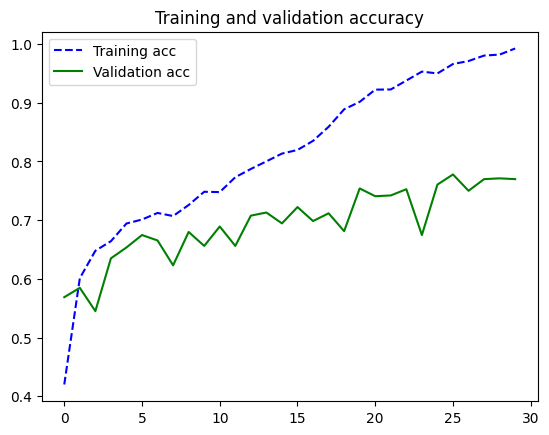

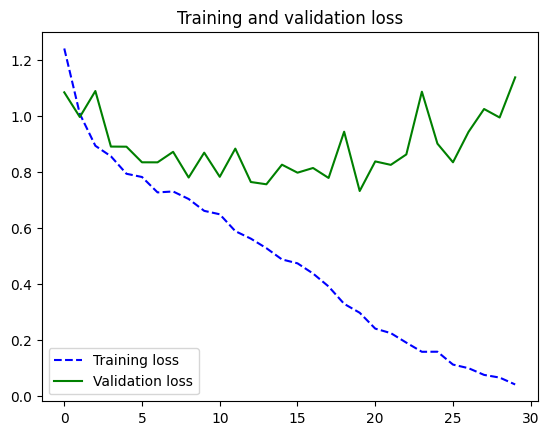

In [ ]:
plot_training_analysis()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# evaluate model on test set
scores = model.evaluate(x=x_test, y=y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# get predictions for test set
y_pred = model.predict(x_test, verbose=1)
y_pred2 = np.argmax(y_pred, axis=1)

# get true labels for test set
y_true2 = np.argmax(y_test, axis=1)
y_true = y_true2

# calculate classification report and confusion matrix
target_names = CLASSES
print(classification_report(y_true2, y_pred2, target_names=target_names))
print(confusion_matrix(y_true2, y_pred2))

24/24 [==============================] - 2s 62ms/step - loss: 1.2323 - accuracy: 0.7817
Test loss: 1.2322659492492676
Test accuracy: 0.7817460298538208
24/24 [==============================] - 3s 111ms/step
              precision    recall  f1-score   support

       Japon       0.89      0.83      0.86       260
      Europe       0.79      0.82      0.81       284
         USA       0.61      0.72      0.66       136
       Coree       0.75      0.58      0.65        76

    accuracy                           0.78       756
   macro avg       0.76      0.74      0.74       756
weighted avg       0.79      0.78      0.78       756

[[215  25  15   5]
 [  6 234  36   8]
 [ 10  26  98   2]
 [ 10  10  12  44]]


In [ ]:
IMG_DIV = SPLIT_RATIO**2
Mat_Vote = y_pred.reshape(IMG_DIV,y_pred.shape[0]//IMG_DIV,len(CLASSES))
# retourne la classe prédite par vote ainsi que les probabilités cumulées des sous images
def majorite(M) :
  nb_sous_images = M.shape[0]
  Maj_vote = np.zeros(len(CLASSES))
  for i in range(nb_sous_images) :
    for j in range(len(CLASSES)):
      Maj_vote[j] += M[i][j]
  maxi = np.argmax(Maj_vote)
  return maxi, Maj_vote

Res_Vote = np.zeros(y_pred.shape[0]//IMG_DIV)
y_pourcentage = np.zeros((y_pred.shape[0]//IMG_DIV, len(CLASSES)))
for i in range(len(Res_Vote)):
  Res_Vote[i], y_pourcentage[i] = majorite(Mat_Vote[:,i,:])

y_pourcentage = y_pourcentage/IMG_DIV
y_predit = Res_Vote
y_reel = y_true[:len(y_predit)]

print("Avant le vote")
print(classification_report(y_true, y_pred2, target_names=target_names))
print(confusion_matrix(y_true, y_pred2))

print("Après le vote")
print(classification_report(y_reel, y_predit, target_names=CLASSES))
print(confusion_matrix(y_reel, y_predit))

''' print("Après le vote")
print(classification_report(y_reel, y_predit, target_names=CLASSES+["Indéfini"]))
print(confusion_matrix(y_reel, y_predit))
 '''

Avant le vote
              precision    recall  f1-score   support

       Japon       0.89      0.83      0.86       260
      Europe       0.79      0.82      0.81       284
         USA       0.61      0.72      0.66       136
       Coree       0.75      0.58      0.65        76

    accuracy                           0.78       756
   macro avg       0.76      0.74      0.74       756
weighted avg       0.79      0.78      0.78       756

[[215  25  15   5]
 [  6 234  36   8]
 [ 10  26  98   2]
 [ 10  10  12  44]]
Après le vote
              precision    recall  f1-score   support

       Japon       0.94      0.89      0.91        65
      Europe       0.81      0.86      0.84        71
         USA       0.65      0.82      0.73        34
       Coree       0.89      0.42      0.57        19

    accuracy                           0.82       189
   macro avg       0.82      0.75      0.76       189
weighted avg       0.83      0.82      0.82       189

[[58  5  2  0]
 [ 0 61  9

' print("Après le vote")\nprint(classification_report(y_reel, y_predit, target_names=CLASSES+["Indéfini"]))\nprint(confusion_matrix(y_reel, y_predit))\n '

In [ ]:
def plot_misclassified_images_pourcent(x_test, y_true, y_pred, y_pourcent, class_1, class_2, img_size=128):
    misclassified_indices = np.where((y_true == class_1) & (y_pred == class_2))[0]
    if len(misclassified_indices) == 0:
      print(f"No images from {CLASSES[class_1]} class misclassified as {CLASSES[class_2]}")
      return
    label = y_pourcent[misclassified_indices]
    label_origine = label[:, class_1]
    label = label[:, class_2]
    sort_indices = np.argsort(label)
    label = label[sort_indices]
    label_origine = label_origine[sort_indices]
    misclassified_indices = misclassified_indices[sort_indices]
    num_images = len(misclassified_indices)
    print(f"Images from {CLASSES[class_1]} class misclassified as {CLASSES[class_2]}")
    for i, index in enumerate(misclassified_indices):
        plt.figure()
        plt.imshow(x_test[index].reshape(img_size, img_size, 3), cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.show()
    for i in range(len(label)):
      print(f"{i+1}: {label[i]} > {label_origine[i]}")


Images from Coree class misclassified as USA


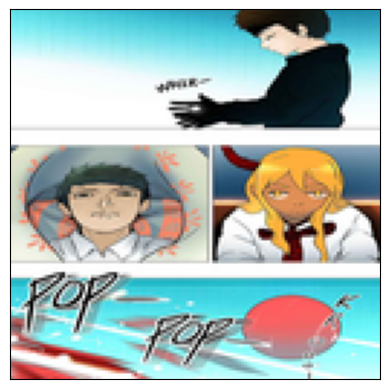

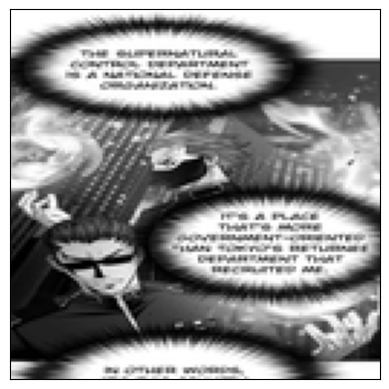

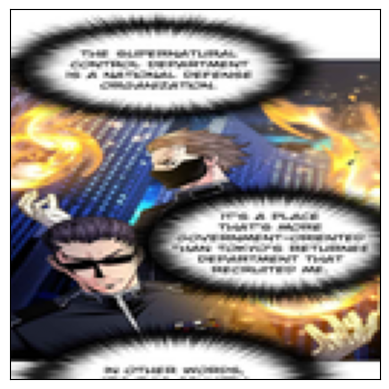

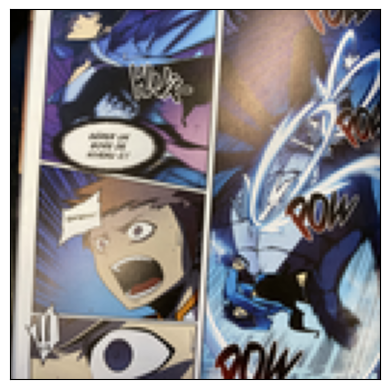

1: 0.5000617688224906 > 0.26342024019379606
2: 0.5694422163069248 > 0.3977974041693909
3: 0.6041805796266999 > 0.39581833246378073
4: 0.8544017672538757 > 0.09821071301834718


In [ ]:
plot_misclassified_images_pourcent(x_test_complet, y_reel, y_predit, y_pourcentage, 3, 2, img_size=IMAGE_SIZE)